## Oppgave 1
Denne oppgaven handler om første dele av en vansklie, se figur. Den første delen av sklien er 20 meter lang og danner (for det meste) vinklen $30^{\circ}$ med underlaget.  
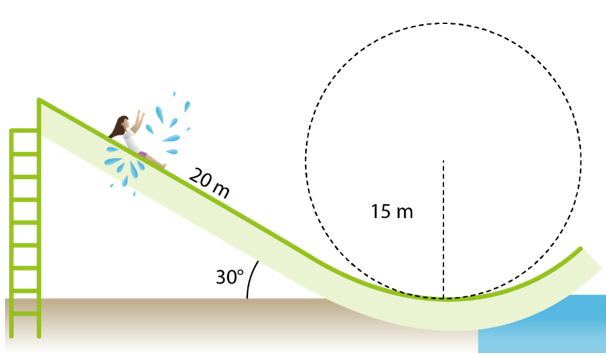

**a)** Fullfør kodesnutten under og estimer farten i det laveste punktet i sklien til en person med masse $m=75$kg <Br/>Anta at friksjonskraften kan modeleres som $F_R=k\cdot v$ der  $k=30$ m/s.

Bunnen av sklien har form som en del av en sirkel med radius 15 m.<br/>**b)** Modifiser programmet slik at kreftene som virker på personen i bunnen av sklien blir skrevet ut


In [1]:
import numpy as np
   
t = 0                     # starttid
dt = 0.01                 # tidssteg
g = 9.81                  # gravitasjonskonstanten
k = 30                    # friksjonskonstanten
m = 75                    # massen til personen i kg
s = 0                     # startposisjon
v = 0                     # startfart
vinkel = np.radians(30) # 30 grader, omgjort til radianer
r = 15


while s < 20:             # løkke som kjører til posisjonen passerer 20 m
    a = (m*g*np.sin(vinkel)- k * v)/m
    v += a * dt 
    s += v * dt 
    t += dt    
G = g * m
N = m * (v**2/r) + G
R = k * v
print(f'Gravitasjonskraften er {G} N, normalkraften er {round(N,2)} N og friksjonskraften er {round(R,2)} N.') 
print(round(v,2), round(t,2))

Gravitasjonskraften er 735.75 N, normalkraften er 1165.52 N og friksjonskraften er 278.13 N.
9.27 3.52


### Oppgave 2
Denne oppgaven går det å løse a,b og c algebrisk, men vi skal bruke løkker fra oppgave b, slik at vi kan utvide oppgaven til å bli en simulering i d)

I en elektronkanon akselereres elektroner mellom to ladde plater som har en spenningsforskjell på 20 V. Elektronene starter i ro ved den negative platen, og avstanden til den positive platen er 1,5 cm.

**a)**	Hvor stor er den elektriske kraften som virker på elektronene? **Definer konstanter, gjør beregninger og skriv ut resultatet.** 


In [2]:
q = 1.60E-19
U1 = 20 # volt
d = 0.015
E = U1 / d
F = E * q
print(f'Det virker en elektrisk kraft på elektronene lik {round(F,18)} N.')

Det virker en elektrisk kraft på elektronene lik 2.13e-16 N.


**b)** Lag en liten while-løkke som bruker kraften fra i sted til å stegvis i **veldig små** tidssteg (prøv dt = $10^{-12}$ s) beregne hvordan akselerasjon, fart og posisjon endrer seg mellom de to platene.  Vis at elektronene har farten $2,7⋅10^6$ $ m/s$  i x-retningen når de treffer den positive platen og finn tiden elektronene bruker på akselerasjonen.

In [3]:
s = 0
t = 0
v = 0
a = 0
m = 9.1094E-31
dt = 10E-12

while s < 0.015:
    a = F/m
    v += a*dt
    s += v * dt 
    t += dt
print(f'Farten elektronene har er {v} m/s som er tilnærmet lik 2.7E6')

Farten elektronene har er 2651034.462569851 m/s som er tilnærmet lik 2.7E6


En del elektroner treffer et hull i den positive platen. Vi legger inn et koordinatsystem med origo der elektronene kommer ut av hullet. På utsiden av hullet ligger det to styreplater med en spenningsforskjell på 2,0 V. Se figuren nedenfor. Avstanden mellom styreplatene er 1,8 cm, og de er 4,8 cm lange. Feltet har retning som på figuren. Elektronene treffer en skjerm satt opp 16 cm fra origo.
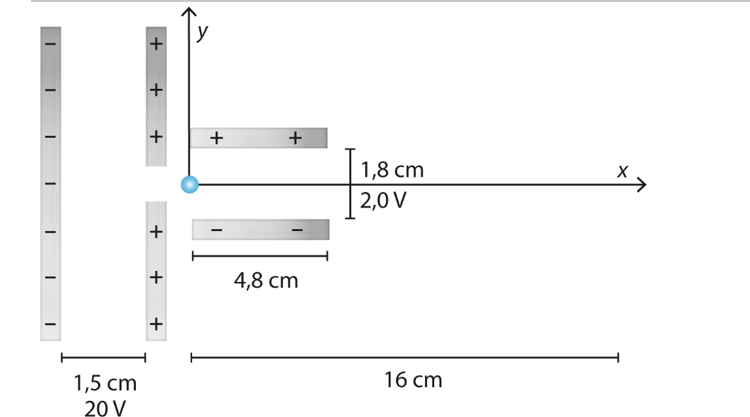

**c)** Lag en while løkke som stegvis beregner hvordan x og y koordinatene endrer seg fra x = 0 cm til x = 16 cm. Husk at akselerasjonen endrer seg om elektronene er mellom platene eller ikke.<Br/> **Skriv ut koordinatene til punktet der elektronene treffer skjermen.** 


In [4]:
t=0
dt=1E-12
q = 1.60E-19
vx = v
vy = 0
sx = 0
sy = 0
ay = 0
U2 = 2 # volt
d = 0.018
m = 9.1094E-31
g = 9.81
G = m * g
x_koordinater = []
y_koordinater = []
while sx < 0.048:
    E = U2 / d
    F = E * q
    ay = (F-G)/m
    vy = vy + ay*dt
    sx = sx + vx * dt 
    sy = sy + vy * dt
    x_koordinater.append(sx)
    y_koordinater.append(sy)
    t += dt
while sx < 0.16:
    E = U2 / d
    F = E * q
    ay = -G/m
    vy = vy + ay*dt
    sx = sx + vx * dt 
    sy = sy + vy * dt
    x_koordinater.append(sx)
    y_koordinater.append(sy)
    t += dt

print(sx, sy)    

0.16000053395374877 0.018128423279494325


**d)** Videreutvikle koden til å samle opp koordinatene i to lister slik at du kan plotte banen elektronen tar. Bruk koden under som utgangspunkt for plottet så får du eksperimentoppsettet med i figuren. 

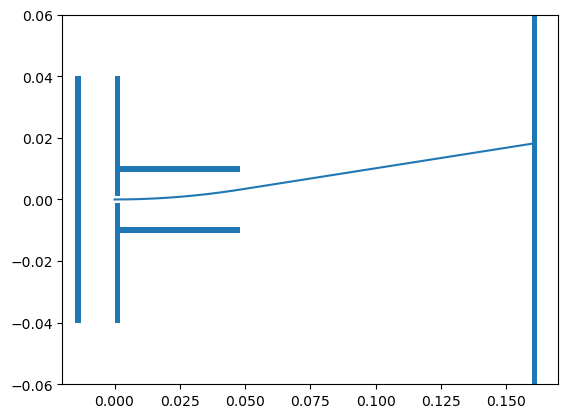

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

x , y = x_koordinater, y_koordinater # Her må du selv lage lister 
plt.plot(x,y)

#Tegner kanon, styreplater og skjerm ved hjelp av rektangler.
plt.gca().add_patch(Rectangle((-0.015,-0.04),0.002,0.08)) # posisjon til nedre venstre hjørne
plt.gca().add_patch(Rectangle((0,0.001),0.002,0.039))     # Bredde og høyde til rektangel
plt.gca().add_patch(Rectangle((0,-0.04),0.002,0.039))
plt.gca().add_patch(Rectangle((0,0.009),0.048,0.002))
plt.gca().add_patch(Rectangle((0,-0.011),0.048,0.002))
plt.gca().add_patch(Rectangle((0.16,-0.06),0.002,0.12))

plt.xlim(-0.02,0.17)
plt.ylim(-0.06,0.06);


**e)** Under viser et eksempel på en simulering som viser et fotballspark med luftmotstand hvor en kan endre vinkelen på sparket med en glider.Kjør kodesnutten og lek litt med det. Kan du stjele ideer fra programmet og kobinere med programmet ditt over og lage en simulering hvor det er mulig å variere avbøyingsspennigen og se hvor elektronene treffer skjermen?

**Bruk programmet ditt til å avgjøre hvor stor må avbøyingsspennigen være for å at elektronstrålen krasjer i veggen og ikke kommer ut fra avbøyingsplatene?** 

In [6]:
import numpy as np
from ipywidgets import interact, FloatSlider

#Definerer konstanter
m = 0.200 #kg
g = -9.81 #m/s^2
k = 0.01 #N/(m/s)^2

# startverdier
v = 20 # m/s
dt = 0.001


# dekoratør som lager en glider og som kjører funksjonen rett under hver gang "alfa" endrer verdi 
@interact(alfa=FloatSlider(value =40, min=0,max=88))

# alle ting som regnes ut og plottes må være inne i funksjonen. Funksjonen må komme rett etter dekratøren.
def regnut_og_plot(alfa):
    
   # Nullstiller alle lister med startverdi hver gang "alfa" endre verdi
    vinkel = np.radians(alfa)
    x=[0]
    y=[1.5]
    vx=v*np.cos(vinkel)
    vy=v*np.sin(vinkel)
    
    # fyller inn x og y verdier i hver sin liste
    while y[-1] > 0: 
        # beregner akselerasjon
        ax = -k*np.linalg.norm([vx,vy])*vx/m # luftmotstand / masse
        ay = g-k*np.linalg.norm([vx,vy])*vy/m # g - luftmotstand/ masse
        
        # Oppdaterer farten fra forrige verdi ved hjelp av akselerasjonen
        vx += ax*dt
        vy += ay*dt
        
        # endrer posisjon fra forrige posisjon og tar vare på verdiene i lister 
        x.append(x[-1]+vx*dt)
        y.append(y[-1]+vy*dt) 
        
       
    # lager et nytt plott hver gang "alfa" endrer 
    plt.plot(x,y)
    plt.plot(x[-1],y[-1],'xr')
    
    # låser plottet for å vise tydligere at grafen endres.
    plt.xlim(0,20)
    plt.ylim(-0.5,12.5)
    
    plt.title(f'Ballen lander etter {x[-1]:.2f} m når startvinkelen er {alfa:.1f} grader')


interactive(children=(FloatSlider(value=40.0, description='alfa', max=88.0), Output()), _dom_classes=('widget-…

In [7]:
import numpy as np
from ipywidgets import interact, FloatSlider

#Definerer konstanter
m = 0.200 #kg
g = -9.81 #m/s^2
k = 0.01 #N/(m/s)^2

# startverdier
v = 20 # m/s
dt = 0.001

#dekoratør som lager en glider og som kjører funksjonen rett under hver gang "alfa" endrer verdi 
@interact(alfa=FloatSlider(value =40, min=0,max=88))

# alle ting som regnes ut og plottes må være inne i funksjonen. Funksjonen må komme rett etter dekratøren.
def regnut_og_plot(alfa):
    
   # Nullstiller alle lister med startverdi hver gang "alfa" endre verdi
    vinkel = np.radians(alfa)
    x=[0]
    y=[1.5]
    vx=v*np.cos(vinkel)
    vy=v*np.sin(vinkel)
    
    # fyller inn x og y verdier i hver sin liste
    while y[-1] > 0: 
        # beregner akselerasjon
        ax = -k*np.linalg.norm([vx,vy])*vx/m # luftmotstand / masse
        ay = g-k*np.linalg.norm([vx,vy])*vy/m # g - luftmotstand/ masse
        
        # Oppdaterer farten fra forrige verdi ved hjelp av akselerasjonen
        vx += ax*dt
        vy += ay*dt
        
        # endrer posisjon fra forrige posisjon og tar vare på verdiene i lister 
        x.append(x[-1]+vx*dt)
        y.append(y[-1]+vy*dt) 
        
       
    # lager et nytt plott hver gang "alfa" endrer 
    plt.plot(x,y)
    plt.plot(x[-1],y[-1],'xr')
    
    # låser plottet for å vise tydligere at grafen endres.
    plt.xlim(0,20)
    plt.ylim(-0.5,12.5)
    
    plt.title(f'Ballen lander etter {x[-1]:.2f} m når startvinkelen er {alfa:.1f} grader')

interactive(children=(FloatSlider(value=40.0, description='alfa', max=88.0), Output()), _dom_classes=('widget-…

In [8]:
from ipywidgets import interact, FloatSlider

@interact(U2=FloatSlider(value =2, min=0,max=88))

def plot(U2):
    t=0
    dt=1E-12
    q = 1.60E-19
    vx = v
    vy = 0
    sx = 0
    sy = 0
    ay = 0
    d = 0.018
    m = 9.1094E-31
    g = 9.81
    G = m * g
    x_koordinater = []
    y_koordinater = []
    E = U2 / d
    
    while sx < 0.048:
        F = E * q
        ay = (F-G)/m
        vy = vy + ay*dt
        sx = sx + vx * dt 
        sy = sy + vy * dt
        x_koordinater.append(sx)
        y_koordinater.append(sy)
        t += dt
    while sx < 0.16:
        F = E * q
        ay = -G/m
        vy = vy + ay*dt
        sx = sx + vx * dt 
        sy = sy + vy * dt
        x_koordinater.append(sx)
        y_koordinater.append(sy)
        t += dt
   

    plt.xlim(-0.02,0.17)
    plt.ylim(-0.06,0.06)
    plt.plot(x_verdier,y_verdier)
    
    plt.gca().add_patch(Rectangle((-0.015,-0.04),0.002,0.08)) # posisjon til nedre venstre hjørne
    plt.gca().add_patch(Rectangle((0,0.001),0.002,0.039))     # Bredde og høyde til rektangel
    plt.gca().add_patch(Rectangle((0,-0.04),0.002,0.039))
    plt.gca().add_patch(Rectangle((0,0.009),0.048,0.002))
    plt.gca().add_patch(Rectangle((0,-0.011),0.048,0.002))
    plt.gca().add_patch(Rectangle((0.16,-0.06),0.002,0.12));




interactive(children=(FloatSlider(value=2.0, description='U2', max=88.0), Output()), _dom_classes=('widget-int…

**f) Ekstra om du har tid.** Kan du videreutvikle programmet ditt med en ekstra glider slik at det er mulig å endre akselerasjonsspenningen? Kan programmet gi beskjed dersom elektroner blir "relativistisk"? Kan du stoppe elektronbanen dersom den krasjer med veggene i avbøyingsfeltet? Har du egne ideer?